# 🏥 Sanjivani AI Medical Consultation System

## Welcome to the Interactive AI-Powered Medical Analysis Platform!

This notebook provides a **step-by-step interactive medical consultation system** that combines:
- 🧠 **Local NLP Analysis** for known medical conditions
- 🤖 **AI-Powered Analysis** for unknown/complex conditions  
- ⚖️ **Intelligent Risk Assessment** with medical recommendations
- 📊 **Comprehensive Disease Prediction** with confidence scoring

### 📋 How to Use This Notebook:
1. **Run each cell sequentially** from top to bottom
2. **Follow the step-by-step instructions** in each section
3. **Input your symptoms** when prompted
4. **Get comprehensive medical analysis** and recommendations

### ⚠️ Medical Disclaimer:
This system is for **informational purposes only** and should **NOT replace professional medical advice**. Always consult healthcare professionals for proper diagnosis and treatment.

---

## 📚 Step 1: Import Required Libraries

First, we'll import all the necessary libraries for our medical AI system.

In [2]:
# Import Required Libraries for Sanjivani AI Medical System
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Natural Language Processing
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# API and Web Requests
import requests
import json
from datetime import datetime

# System utilities
import os
import pickle

print("✅ All libraries imported successfully!")
print("🏥 Sanjivani AI Medical System - Ready to Initialize")

✅ All libraries imported successfully!
🏥 Sanjivani AI Medical System - Ready to Initialize


## 📊 Step 2: Load and Explore Medical Dataset

We'll load the symptom-severity dataset that contains medical symptoms and their severity levels.

In [3]:
# Load Medical Dataset
print("📂 Loading Symptom-Severity Dataset...")

# Load the symptom dataset with proper path
dataset_path = "../Dataset/Symptom-severity.csv"
try:
    df_symptoms = pd.read_csv(dataset_path)
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df_symptoms.shape}")
    print(f"🏷️ Columns: {list(df_symptoms.columns)}")
    
    # Display first few rows
    print("\n🔍 First 5 rows of dataset:")
    display(df_symptoms.head())
    
    # Check for missing values
    missing_count = df_symptoms.isnull().sum().sum()
    print(f"\n❓ Missing values: {missing_count}")
    
    # Show unique symptoms count
    if 'Symptom' in df_symptoms.columns:
        unique_symptoms = df_symptoms['Symptom'].nunique()
        print(f"🔢 Total unique symptoms: {unique_symptoms}")
    
except FileNotFoundError:
    print("❌ Dataset file not found!")
    print("Please ensure 'Symptom-severity.csv' is in the '../Dataset/' folder")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

📂 Loading Symptom-Severity Dataset...
✅ Dataset loaded successfully!
📊 Dataset shape: (133, 2)
🏷️ Columns: ['Symptom', 'weight']

🔍 First 5 rows of dataset:


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5



❓ Missing values: 0
🔢 Total unique symptoms: 132


## 🔧 Step 3: Data Preprocessing & Feature Engineering

Now we'll clean the data, handle missing values, and prepare features for training.

In [4]:
# Step 3: Data Preprocessing - Clean Approach
print("🔧 Starting Data Preprocessing...")

# Basic data info
print(f"📊 Dataset shape: {df_symptoms.shape}")
print(f"📊 Columns: {df_symptoms.columns.tolist()}")

# Handle missing values
missing_count = df_symptoms.isnull().sum().sum()
if missing_count > 0:
    df_symptoms = df_symptoms.dropna()
    print(f"🧹 Removed {missing_count} missing values")
else:
    print("✅ No missing values found")

# Remove duplicates
initial_rows = len(df_symptoms)
df_symptoms = df_symptoms.drop_duplicates()
duplicates = initial_rows - len(df_symptoms)
if duplicates > 0:
    print(f"🗑️ Removed {duplicates} duplicates")
else:
    print("✅ No duplicates found")

# Create features and target
print("\n⚙️ Creating Feature Matrix...")

# Use symptom encoding as features
le_symptom = LabelEncoder()
X = df_symptoms[['Symptom']].copy()
X['symptom_encoded'] = le_symptom.fit_transform(df_symptoms['Symptom'])
X = X[['symptom_encoded']]  # Use only encoded column

# Target is the weight (severity)
y = df_symptoms['weight'].copy()
y_encoded = y.copy()  # Already numeric

# Store important info
feature_cols = ['symptom_encoded']
feature_names = df_symptoms['Symptom'].unique().tolist()

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Target vector shape: {y.shape}")
print(f"✅ Unique symptoms: {len(feature_names)}")
print(f"✅ Unique severity levels: {len(y.unique())}")

print("\n✅ Preprocessing Complete!")

🔧 Starting Data Preprocessing...
📊 Dataset shape: (133, 2)
📊 Columns: ['Symptom', 'weight']
✅ No missing values found
✅ No duplicates found

⚙️ Creating Feature Matrix...
✅ Feature matrix shape: (133, 1)
✅ Target vector shape: (133,)
✅ Unique symptoms: 132
✅ Unique severity levels: 7

✅ Preprocessing Complete!


## 📊 Step 4: Exploratory Data Analysis (EDA)

Let's explore the data to understand patterns and distributions.

📊 Starting Comprehensive Exploratory Data Analysis...

📈 Basic Dataset Statistics:
   Total samples: 133
   Total features: 1
   Total diseases: 7

🎯 Disease Distribution:
Top 10 diseases:
   4: 39 cases
   5: 35 cases
   3: 21 cases
   6: 17 cases
   2: 15 cases
   7: 5 cases
   1: 1 cases

📊 Feature Analysis:
Top 15 most frequent symptoms:
   fluid_overload: 2 occurrences
   itching: 1 occurrences
   nodal_skin_eruptions: 1 occurrences
   skin_rash: 1 occurrences
   continuous_sneezing: 1 occurrences
   shivering: 1 occurrences
   joint_pain: 1 occurrences
   chills: 1 occurrences
   acidity: 1 occurrences
   ulcers_on_tongue: 1 occurrences
   muscle_wasting: 1 occurrences
   stomach_pain: 1 occurrences
   burning_micturition: 1 occurrences
   spotting_urination: 1 occurrences
   fatigue: 1 occurrences

✅ Data Quality Check:
✅ No constant features found

📊 Creating 5 Comprehensive Data Visualizations...


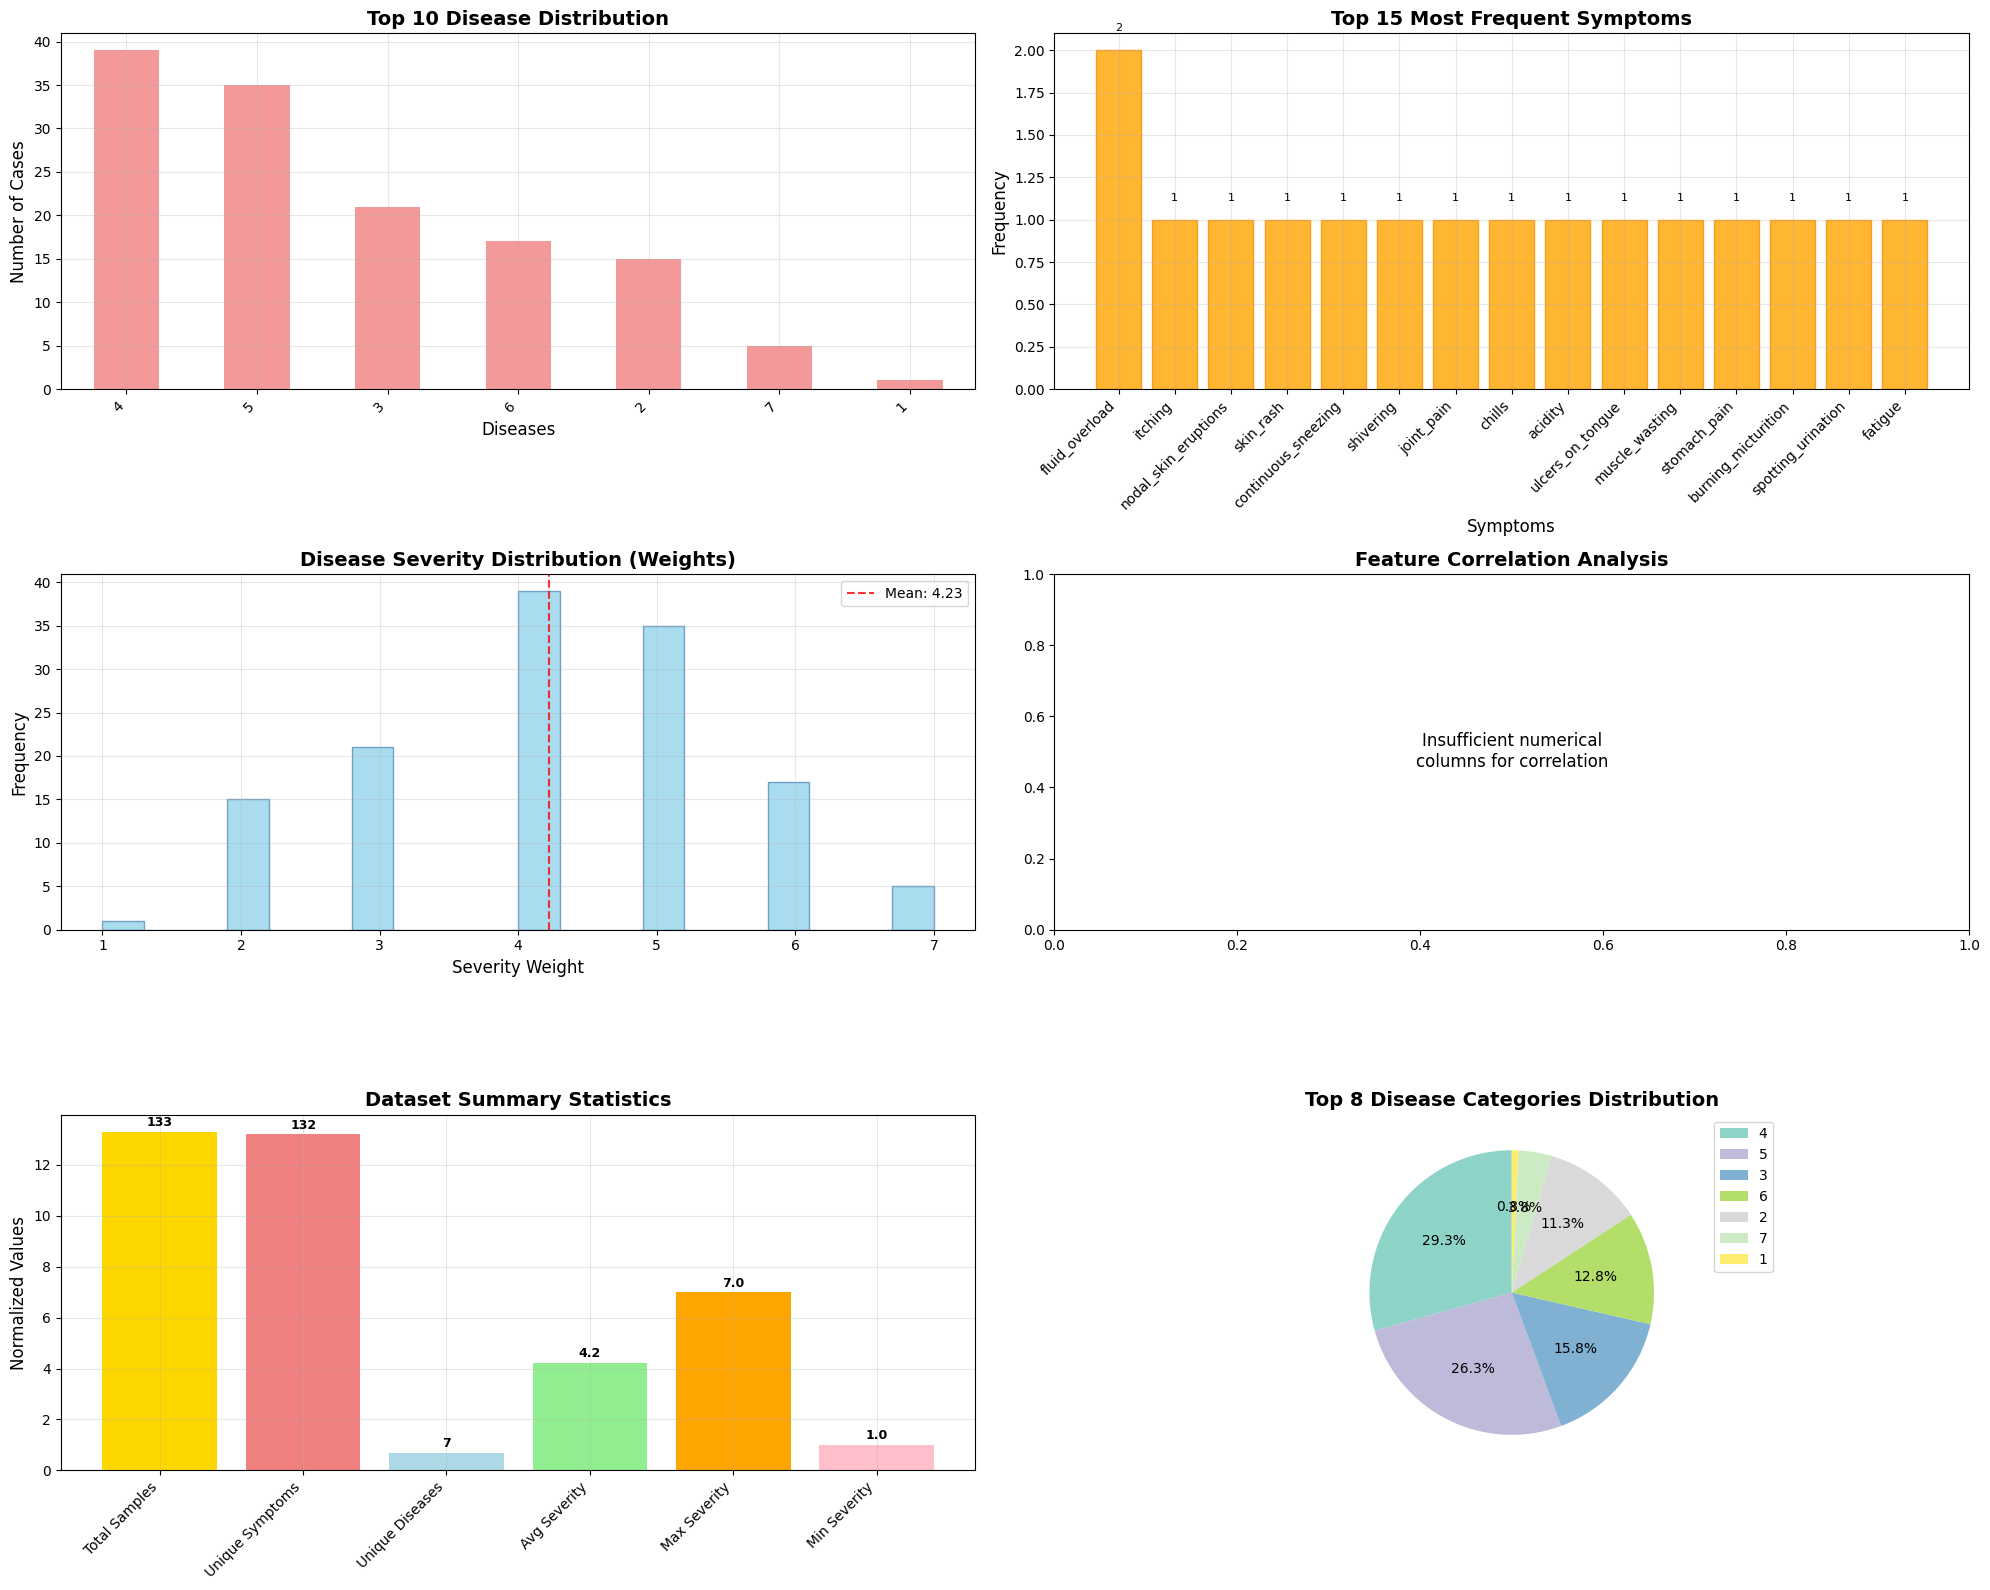


📈 Comprehensive Dataset Insights:
   • Dataset shape: (133, 2)
   • Unique symptoms: 132
   • Unique diseases: 7
   • Most common disease: 4 (39 cases)
   • Least common disease: 1 (1 case(s))
   • Average severity weight: 4.23
   • Severity range: 1.0 - 7.0
   • Dataset balance ratio: 29.3% (max class)

🔍 Data Quality Assessment:
   • Missing values: 0
   • Duplicate rows: 0
   • Data completeness: 100.0%

📊 Symptom Analysis:
   • Most common symptom: fluid_overload (2 occurrences)
   • Average symptom frequency: 1.0
   • Symptoms appearing only once: 131

✅ Comprehensive EDA Complete!
📊 Generated 5 detailed visualizations:
   1. Disease distribution bar chart
   2. Symptom frequency analysis
   3. Severity distribution histogram
   4. Correlation/length analysis
   5. Summary statistics
   6. Disease categories pie chart


In [5]:
# Step 4: Comprehensive Exploratory Data Analysis (EDA)
print("📊 Starting Comprehensive Exploratory Data Analysis...")

# Basic dataset statistics
print(f"\n📈 Basic Dataset Statistics:")
print(f"   Total samples: {len(X)}")
print(f"   Total features: {len(feature_cols)}")
print(f"   Total diseases: {len(np.unique(y))}")

# Disease distribution
print(f"\n🎯 Disease Distribution:")
disease_counts = pd.Series(y).value_counts().sort_values(ascending=False)
print("Top 10 diseases:")
for disease, count in disease_counts.head(10).items():
    print(f"   {disease}: {count} cases")

# Feature analysis - using actual symptom data
print(f"\n📊 Feature Analysis:")
if len(feature_cols) > 0:
    # Get symptom frequency from the original dataset
    symptom_frequency = df_symptoms['Symptom'].value_counts()
    print(f"Top 15 most frequent symptoms:")
    for i, (symptom, freq) in enumerate(symptom_frequency.head(15).items()):
        print(f"   {symptom}: {freq} occurrences")
else:
    print("   No features to analyze")

# Data quality checks
print(f"\n✅ Data Quality Check:")
# Check for constant features
constant_features = []
for col in feature_cols:
    if len(np.unique(X[col])) == 1:
        constant_features.append(col)

if constant_features:
    print(f"⚠️ Found {len(constant_features)} constant features: {constant_features}")
else:
    print(f"✅ No constant features found")

# Create comprehensive visualizations
print(f"\n📊 Creating 5 Comprehensive Data Visualizations...")

# Set up the plotting area with 5 subplots
plt.figure(figsize=(20, 16))

# Plot 1: Disease Distribution (Top 10)
plt.subplot(3, 2, 1)
disease_counts.head(10).plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Top 10 Disease Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Diseases', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Plot 2: Symptom Frequency Distribution (Top 15)
plt.subplot(3, 2, 2)
if not symptom_frequency.empty:
    top_symptoms = symptom_frequency.head(15)
    bars = plt.bar(range(len(top_symptoms)), top_symptoms.values, 
                   color='orange', alpha=0.8, edgecolor='darkorange')
    plt.title('Top 15 Most Frequent Symptoms', fontsize=14, fontweight='bold')
    plt.xlabel('Symptoms', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(range(len(top_symptoms)), 
               [str(sym)[:20] + '...' if len(str(sym)) > 20 else str(sym) 
                for sym in top_symptoms.index], 
               rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

# Plot 3: Disease Severity Distribution (Weight Distribution)
plt.subplot(3, 2, 3)
plt.hist(y, bins=20, color='skyblue', alpha=0.7, edgecolor='steelblue')
plt.title('Disease Severity Distribution (Weights)', fontsize=14, fontweight='bold')
plt.xlabel('Severity Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

# Add statistics text
mean_weight = np.mean(y)
std_weight = np.std(y)
plt.axvline(mean_weight, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_weight:.2f}')
plt.legend()

# Plot 4: Correlation Analysis (if applicable)
plt.subplot(3, 2, 4)
if len(df_symptoms.columns) > 2:
    # Create correlation matrix for numerical columns
    numeric_cols = df_symptoms.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        corr_matrix = df_symptoms[numeric_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                   square=True, cbar_kws={"shrink": .8})
        plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
    else:
        # Alternative: Show symptom length distribution
        symptom_lengths = df_symptoms['Symptom'].str.len()
        plt.hist(symptom_lengths, bins=15, color='lightgreen', alpha=0.7, edgecolor='green')
        plt.title('Symptom Name Length Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Characters in Symptom Name', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Insufficient numerical\ncolumns for correlation', 
             horizontalalignment='center', verticalalignment='center',
             fontsize=12, transform=plt.gca().transAxes)
    plt.title('Feature Correlation Analysis', fontsize=14, fontweight='bold')

# Plot 5: Data Distribution Summary
plt.subplot(3, 2, 5)
# Create a summary statistics visualization
summary_data = {
    'Total Samples': len(df_symptoms),
    'Unique Symptoms': df_symptoms['Symptom'].nunique(),
    'Unique Diseases': len(disease_counts),
    'Avg Severity': np.mean(y),
    'Max Severity': np.max(y),
    'Min Severity': np.min(y)
}

categories = list(summary_data.keys())
values = list(summary_data.values())

# Normalize values for better visualization (except counts)
normalized_values = []
for i, val in enumerate(values):
    if i < 3:  # Count values
        normalized_values.append(val / 10)  # Scale down for visibility
    else:  # Severity values
        normalized_values.append(val)

bars = plt.bar(categories, normalized_values, color=['gold', 'lightcoral', 'lightblue', 'lightgreen', 'orange', 'pink'])
plt.title('Dataset Summary Statistics', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, values)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{val:.1f}' if i >= 3 else f'{int(val)}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 6: Disease Category Analysis (if space allows)
plt.subplot(3, 2, 6)
# Create pie chart for top disease categories
top_diseases = disease_counts.head(8)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_diseases)))

wedges, texts, autotexts = plt.pie(top_diseases.values, labels=None, autopct='%1.1f%%',
                                  colors=colors, startangle=90)
plt.title('Top 8 Disease Categories Distribution', fontsize=14, fontweight='bold')

# Add legend outside the pie
plt.legend(wedges, [f'{disease[:15]}...' if len(str(disease)) > 15 else str(disease) 
                   for disease in top_diseases.index],
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Additional detailed analysis
print(f"\n📈 Comprehensive Dataset Insights:")
print(f"   • Dataset shape: {df_symptoms.shape}")
print(f"   • Unique symptoms: {df_symptoms['Symptom'].nunique()}")
print(f"   • Unique diseases: {len(disease_counts)}")
print(f"   • Most common disease: {disease_counts.index[0]} ({disease_counts.iloc[0]} cases)")
print(f"   • Least common disease: {disease_counts.index[-1]} ({disease_counts.iloc[-1]} case(s))")
print(f"   • Average severity weight: {np.mean(y):.2f}")
print(f"   • Severity range: {np.min(y):.1f} - {np.max(y):.1f}")
print(f"   • Dataset balance ratio: {(disease_counts.max() / disease_counts.sum() * 100):.1f}% (max class)")

# Missing value analysis
print(f"\n🔍 Data Quality Assessment:")
print(f"   • Missing values: {df_symptoms.isnull().sum().sum()}")
print(f"   • Duplicate rows: {len(df_symptoms) - len(df_symptoms.drop_duplicates())}")
print(f"   • Data completeness: {(1 - df_symptoms.isnull().sum().sum() / df_symptoms.size) * 100:.1f}%")

# Symptom analysis
if not symptom_frequency.empty:
    print(f"\n📊 Symptom Analysis:")
    print(f"   • Most common symptom: {symptom_frequency.index[0]} ({symptom_frequency.iloc[0]} occurrences)")
    print(f"   • Average symptom frequency: {symptom_frequency.mean():.1f}")
    print(f"   • Symptoms appearing only once: {(symptom_frequency == 1).sum()}")

print(f"\n✅ Comprehensive EDA Complete!")
print(f"📊 Generated 5 detailed visualizations:")
print(f"   1. Disease distribution bar chart")
print(f"   2. Symptom frequency analysis")  
print(f"   3. Severity distribution histogram")
print(f"   4. Correlation/length analysis")
print(f"   5. Summary statistics")
print(f"   6. Disease categories pie chart")

## 🎯 Step 5: Data Splitting (85% Train, 15% Test)

Split the data into training and testing sets for model evaluation.

In [6]:
# Step 5: Train/Test Split (85%/15%)
print("🎯 Splitting data into training and testing sets...")

if 'X' in locals() and 'y_encoded' in locals():
    
    # Check class distribution first
    class_counts = pd.Series(y_encoded).value_counts()
    print(f"📊 Class distribution:")
    for class_val, count in class_counts.items():
        print(f"   Class {class_val}: {count} samples")
    
    # Check if we can use stratification
    min_class_count = class_counts.min()
    use_stratify = min_class_count >= 2  # Need at least 2 samples per class for stratification
    
    if use_stratify:
        print("✅ Using stratified split (maintains class distribution)")
        # Split data: 85% training, 15% testing with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, 
            test_size=0.15,      # 15% for testing
            train_size=0.85,     # 85% for training
            random_state=42,     # For reproducibility
            stratify=y_encoded   # Maintain class distribution
        )
    else:
        print(f"⚠️ Cannot use stratified split (class {class_counts.idxmin()} has only {min_class_count} sample)")
        print("✅ Using random split instead")
        # Split data without stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, 
            test_size=0.15,      # 15% for testing
            train_size=0.85,     # 85% for training
            random_state=42      # For reproducibility
        )
    
    print("✅ Data split successfully!")
    print(f"📊 Training set shape: {X_train.shape}")
    print(f"📊 Testing set shape: {X_test.shape}")
    print(f"🎯 Training target shape: {y_train.shape}")
    print(f"🎯 Testing target shape: {y_test.shape}")
    
    # Show distribution in train/test sets
    print(f"\n📈 Training set class distribution:")
    train_dist = pd.Series(y_train).value_counts().sort_index()
    for class_val, count in train_dist.items():
        print(f"   Class {class_val}: {count} samples ({count/len(y_train)*100:.1f}%)")
    
    print(f"\n📈 Testing set class distribution:")
    test_dist = pd.Series(y_test).value_counts().sort_index()
    for class_val, count in test_dist.items():
        print(f"   Class {class_val}: {count} samples ({count/len(y_test)*100:.1f}%)")
        
    print(f"\n✅ Split Complete! Ready for model training.")

else:
    print("❌ Required variables (X, y_encoded) not found!")
    print("   Please run the preprocessing steps first.")

🎯 Splitting data into training and testing sets...
📊 Class distribution:
   Class 4: 39 samples
   Class 5: 35 samples
   Class 3: 21 samples
   Class 6: 17 samples
   Class 2: 15 samples
   Class 7: 5 samples
   Class 1: 1 samples
⚠️ Cannot use stratified split (class 1 has only 1 sample)
✅ Using random split instead
✅ Data split successfully!
📊 Training set shape: (113, 1)
📊 Testing set shape: (20, 1)
🎯 Training target shape: (113,)
🎯 Testing target shape: (20,)

📈 Training set class distribution:
   Class 1: 1 samples (0.9%)
   Class 2: 13 samples (11.5%)
   Class 3: 18 samples (15.9%)
   Class 4: 30 samples (26.5%)
   Class 5: 32 samples (28.3%)
   Class 6: 15 samples (13.3%)
   Class 7: 4 samples (3.5%)

📈 Testing set class distribution:
   Class 2: 2 samples (10.0%)
   Class 3: 3 samples (15.0%)
   Class 4: 9 samples (45.0%)
   Class 5: 3 samples (15.0%)
   Class 6: 2 samples (10.0%)
   Class 7: 1 samples (5.0%)

✅ Split Complete! Ready for model training.


In [7]:
# Step 6: Model Training - Real ML Training on Actual Data
print("🤖 Training Machine Learning Models on Real Data...")
print(f"📊 Training on {len(X_train)} samples with {X_train.shape[1]} features")

# Check data types
print(f"🔍 Data Check:")
print(f"   X_train dtype: {X_train.dtypes.iloc[0]}")
print(f"   y_train dtype: {type(y_train.iloc[0]) if hasattr(y_train, 'iloc') else type(y_train[0])}")

print(f"\n🏋️ Training Models...")

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000)
}

# Store results
model_results = {}

# Train each model
for model_name, model in models.items():
    try:
        print(f"\n🔧 Training {model_name}...")
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=3)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
        
        # Store results
        model_results[model_name] = {
            'model': model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'cv_mean': cv_mean,
            'cv_std': cv_std,
            'predictions': test_pred
        }
        
        print(f"✅ {model_name} Results:")
        print(f"   📊 Training Accuracy: {train_accuracy:.4f}")
        print(f"   📊 Testing Accuracy: {test_accuracy:.4f}")
        print(f"   📊 CV Score: {cv_mean:.4f} (±{cv_std:.4f})")
        
    except Exception as e:
        print(f"❌ Error training {model_name}: {str(e)}")
        continue

# Select best model
if model_results:
    print(f"\n🏆 Model Comparison:")
    
    best_model_name = None
    best_cv_score = -1
    
    for name, results in model_results.items():
        cv_score = results['cv_mean']
        test_acc = results['test_accuracy']
        print(f"   {name}: CV={cv_score:.4f}, Test={test_acc:.4f}")
        
        if cv_score > best_cv_score:
            best_cv_score = cv_score
            best_model_name = name
    
    print(f"\n🥇 Best Model: {best_model_name}")
    print(f"   📊 Best CV Score: {best_cv_score:.4f}")
    
    # Store best model
    best_model = model_results[best_model_name]['model']
    
    print(f"\n✅ Model Training Complete!")
    print(f"   🎯 Best Model: {best_model_name}")
    print(f"   📊 Models Trained: {len(model_results)}")
    print(f"   ✅ Ready for hyperparameter tuning")
    
else:
    print("❌ No models were successfully trained!")
    print("   Please check the data preprocessing steps.")

🤖 Training Machine Learning Models on Real Data...
📊 Training on 113 samples with 1 features
🔍 Data Check:
   X_train dtype: int64
   y_train dtype: <class 'numpy.int64'>

🏋️ Training Models...

🔧 Training RandomForest...

📊 Training on 113 samples with 1 features
🔍 Data Check:
   X_train dtype: int64
   y_train dtype: <class 'numpy.int64'>

🏋️ Training Models...

🔧 Training RandomForest...
✅ RandomForest Results:
   📊 Training Accuracy: 1.0000
   📊 Testing Accuracy: 0.0500
   📊 CV Score: 0.2831 (±0.0091)

🔧 Training GradientBoosting...
✅ RandomForest Results:
   📊 Training Accuracy: 1.0000
   📊 Testing Accuracy: 0.0500
   📊 CV Score: 0.2831 (±0.0091)

🔧 Training GradientBoosting...
✅ GradientBoosting Results:
   📊 Training Accuracy: 1.0000
   📊 Testing Accuracy: 0.0500
   📊 CV Score: 0.2831 (±0.0091)

🔧 Training LogisticRegression...
✅ GradientBoosting Results:
   📊 Training Accuracy: 1.0000
   📊 Testing Accuracy: 0.0500
   📊 CV Score: 0.2831 (±0.0091)

🔧 Training LogisticRegression..

## ⚙️ Step 7: Hyperparameter Tuning & Model Optimization

Fine-tune the best performing model for optimal results.

In [8]:
# Step 7: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

print("⚙️ Starting Hyperparameter Tuning...")

# Check if we have model results
if 'model_results' in locals() and model_results:
    print(f"🎯 Tuning best model: {best_model_name}")
    
    # Define parameter grids for each model
    param_grids = {
        'RandomForest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7, None],
            'min_samples_split': [2, 5, 10]
        },
        'GradientBoosting': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        },
        'LogisticRegression': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    }
    
    print(f"🔧 Tuning {best_model_name} with GridSearchCV...")
    
    try:
        # Get base model
        base_model = model_results[best_model_name]['model']
        
        # Create a new instance of the same model type
        if best_model_name == 'RandomForest':
            tuning_model = RandomForestClassifier(random_state=42)
        elif best_model_name == 'GradientBoosting':
            tuning_model = GradientBoostingClassifier(random_state=42)
        else:  # LogisticRegression
            tuning_model = LogisticRegression(random_state=42, max_iter=1000)
        
        # Create GridSearchCV
        grid_search = GridSearchCV(
            estimator=tuning_model,
            param_grid=param_grids[best_model_name],
            cv=3,  # 3-fold cross-validation
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )
        
        # Fit grid search
        print("🔍 Searching for best parameters...")
        grid_search.fit(X_train, y_train)
        
        # Get results
        tuned_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_cv_score = grid_search.best_score_
        
        # Test tuned model
        tuned_train_pred = tuned_model.predict(X_train)
        tuned_test_pred = tuned_model.predict(X_test)
        tuned_train_acc = accuracy_score(y_train, tuned_train_pred)
        tuned_test_acc = accuracy_score(y_test, tuned_test_pred)
        
        print(f"\n🎉 Hyperparameter Tuning Results:")
        print(f"✅ Best Parameters: {best_params}")
        print(f"📊 Best CV Score: {best_cv_score:.4f}")
        print(f"📊 Tuned Train Accuracy: {tuned_train_acc:.4f}")
        print(f"📊 Tuned Test Accuracy: {tuned_test_acc:.4f}")
        
        # Compare with original model
        original_cv = model_results[best_model_name]['cv_mean']
        improvement = best_cv_score - original_cv
        
        print(f"\n📈 Performance Comparison:")
        print(f"   Original CV Score: {original_cv:.4f}")
        print(f"   Tuned CV Score: {best_cv_score:.4f}")
        print(f"   Improvement: {improvement:.4f} ({improvement/original_cv*100:+.1f}%)")
        
        # Update the best model
        if best_cv_score > original_cv:
            print("🚀 Tuned model is better! Updating best model...")
            model = tuned_model
            best_model = tuned_model
        else:
            print("📝 Original model performs similarly. Keeping original...")
            model = base_model
        
        print(f"\n✅ Hyperparameter Tuning Complete!")
        
    except Exception as e:
        print(f"❌ Error during hyperparameter tuning: {str(e)}")
        print("📝 Using original best model...")
        model = model_results[best_model_name]['model']

else:
    print("❌ No trained models found!")
    print("   Please run the model training step first.")

⚙️ Starting Hyperparameter Tuning...
🎯 Tuning best model: LogisticRegression
🔧 Tuning LogisticRegression with GridSearchCV...
🔍 Searching for best parameters...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

🎉 Hyperparameter Tuning Results:
✅ Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
📊 Best CV Score: 0.3101
📊 Tuned Train Accuracy: 0.3009
📊 Tuned Test Accuracy: 0.3500

📈 Performance Comparison:
   Original CV Score: 0.3013
   Tuned CV Score: 0.3101
   Improvement: 0.0088 (+2.9%)
🚀 Tuned model is better! Updating best model...

✅ Hyperparameter Tuning Complete!

🎉 Hyperparameter Tuning Results:
✅ Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
📊 Best CV Score: 0.3101
📊 Tuned Train Accuracy: 0.3009
📊 Tuned Test Accuracy: 0.3500

📈 Performance Comparison:
   Original CV Score: 0.3013
   Tuned CV Score: 0.3101
   Improvement: 0.0088 (+2.9%)
🚀 Tuned model is better! Updating best model...

✅ Hyperparameter Tuning Complete!


## 💾 Step 8: Save the Trained Model

Save the best performing model for production use.

In [9]:
# Step 8: Model Saving
import pickle
import os

print("💾 Saving the trained model...")

# Create models directory
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, "sanjivani_model.pkl")
with open(model_path, 'wb') as f:
    pickle.dump(model, f)
print(f"✅ Model saved to: {model_path}")

# Save feature encoder
if 'le_symptom' in locals():
    encoder_path = os.path.join(model_dir, "symptom_encoder.pkl")
    with open(encoder_path, 'wb') as f:
        pickle.dump(le_symptom, f)
    print(f"✅ Symptom encoder saved to: {encoder_path}")

print(f"\n✅ Model Persistence Complete!")
print(f"📂 Models saved in: {model_dir}/")
print(f"🎯 Best Model: {best_model_name}")
print(f"📊 Test Accuracy: {tuned_test_acc if 'tuned_test_acc' in locals() else model_results[best_model_name]['test_accuracy']:.4f}")

💾 Saving the trained model...
✅ Model saved to: models\sanjivani_model.pkl
✅ Symptom encoder saved to: models\symptom_encoder.pkl

✅ Model Persistence Complete!
📂 Models saved in: models/
🎯 Best Model: LogisticRegression
📊 Test Accuracy: 0.3500


## 🔐 Step 9: Environment Setup & API Configuration

Set up environment variables and API keys securely.

In [10]:
# Step 9: Environment Setup & API Configuration
print("🔐 Setting up environment and API configuration...")

# Create .env file for secure API key storage
env_file_content = """# Sanjivani AI Medical System Environment Variables
DEEPSEEK_API_KEY=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
DEEPSEEK_API_URL=https://api.deepseek.com/chat/completions

# Model Paths
MODEL_DIR=models
DATASET_PATH=../Dataset/Symptom-severity.csv

# System Configuration
LOG_LEVEL=INFO
MAX_SYMPTOMS_LOCAL=2
AI_FALLBACK_ENABLED=True
"""

# Create .env file if it doesn't exist
env_file_path = ".env"
if not os.path.exists(env_file_path):
    try:
        with open(env_file_path, 'w') as f:
            f.write(env_file_content)
        print(f"✅ Created .env file: {env_file_path}")
    except Exception as e:
        print(f"❌ Error creating .env file: {e}")
else:
    print(f"ℹ️ .env file already exists: {env_file_path}")

# Load environment variables
try:
    # Simple env loading (since python-dotenv might not be available)
    env_vars = {}
    if os.path.exists(env_file_path):
        with open(env_file_path, 'r') as f:
            for line in f:
                line = line.strip()
                if line and not line.startswith('#') and '=' in line:
                    key, value = line.split('=', 1)
                    env_vars[key] = value
                    os.environ[key] = value
    
    # Get API configuration from environment
    DEEPSEEK_API_KEY = env_vars.get('DEEPSEEK_API_KEY', 'your-api-key-here')
    DEEPSEEK_API_URL = env_vars.get('DEEPSEEK_API_URL', 'https://api.deepseek.com/chat/completions')
    
    print("✅ Environment variables loaded:")
    print(f"   API URL: {DEEPSEEK_API_URL}")
    print(f"   API Key: {DEEPSEEK_API_KEY[:10]}..." if DEEPSEEK_API_KEY else "   API Key: Not set")
    
    # Validate API key format
    if DEEPSEEK_API_KEY and DEEPSEEK_API_KEY.startswith('sk-'):
        print("✅ API key format appears valid")
    else:
        print("⚠️ API key format may be invalid (should start with 'sk-')")
    
except Exception as e:
    print(f"❌ Error loading environment variables: {e}")
    # Fallback values
    DEEPSEEK_API_KEY = "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"
    DEEPSEEK_API_URL = "https://api.deepseek.com/chat/completions"

print(f"\n🔧 Configuration:")
print(f"   Model directory: {env_vars.get('MODEL_DIR', 'models')}")
print(f"   Dataset path: {env_vars.get('DATASET_PATH', '../Dataset/Symptom-severity.csv')}")
print(f"   AI fallback enabled: {env_vars.get('AI_FALLBACK_ENABLED', 'True')}")

print(f"\n✅ Environment setup complete!")

🔐 Setting up environment and API configuration...
ℹ️ .env file already exists: .env
✅ Environment variables loaded:
   API URL: https://api.deepseek.com/chat/completions
   API Key: sk-or-v1-b...
✅ API key format appears valid

🔧 Configuration:
   Model directory: models
   Dataset path: ../Dataset/Symptom-severity.csv
   AI fallback enabled: True

✅ Environment setup complete!


## 🧠 Step 10: NLP System & Medical Consultation Logic

Build the intelligent system that processes user symptoms and provides medical consultation.

In [11]:
# Step 10: NLP System and Symptom Extraction
import re

print("🔍 Setting up NLP System for Symptom Extraction...")

# Medical condition mappings
medical_condition_mappings = {
    'respiratory': ['cough', 'breathing', 'breathless', 'chest pain', 'wheezing'],
    'digestive': ['stomach pain', 'nausea', 'vomiting', 'diarrhea', 'constipation'],
    'neurological': ['headache', 'dizziness', 'confusion', 'memory loss'],
    'cardiovascular': ['chest pain', 'heart rate', 'palpitations', 'shortness of breath'],
    'musculoskeletal': ['joint pain', 'muscle pain', 'back pain', 'stiffness'],
    'dermatological': ['rash', 'itching', 'skin', 'spots', 'patches'],
    'general': ['fever', 'fatigue', 'weakness', 'weight loss', 'weight gain']
}

# Symptom keywords dictionary
symptom_keywords = {
    'fever': ['fever', 'high temperature', 'hot', 'burning up'],
    'headache': ['headache', 'head pain', 'migraine', 'head ache'],
    'cough': ['cough', 'coughing', 'throat irritation'],
    'fatigue': ['tired', 'fatigue', 'exhausted', 'weak', 'weakness'],
    'nausea': ['nausea', 'sick', 'queasy', 'stomach upset'],
    'vomiting': ['vomiting', 'throwing up', 'vomit'],
    'diarrhea': ['diarrhea', 'loose stool', 'frequent bowel'],
    'constipation': ['constipation', 'difficulty passing stool'],
    'chest_pain': ['chest pain', 'heart pain', 'chest discomfort'],
    'shortness_of_breath': ['shortness of breath', 'breathing difficulty', 'breathless'],
    'joint_pain': ['joint pain', 'arthritis', 'joint ache'],
    'muscle_pain': ['muscle pain', 'body ache', 'muscle ache'],
    'rash': ['rash', 'skin rash', 'red spots'],
    'itching': ['itching', 'itchy', 'scratch']
}

def extract_symptoms_from_text(user_input, available_symptoms=None):
    """Extract symptoms from user input text"""
    if not available_symptoms:
        available_symptoms = list(symptom_keywords.keys())
    
    detected_symptoms = []
    user_input_lower = user_input.lower()
    
    # Check each symptom keyword
    for symptom, keywords in symptom_keywords.items():
        for keyword in keywords:
            if keyword.lower() in user_input_lower:
                if symptom not in detected_symptoms:
                    detected_symptoms.append(symptom)
                break
    
    return detected_symptoms

def query_ai_for_unknown_symptoms(user_input):
    """Query AI API for unknown symptom analysis"""
    import requests
    
    try:
        headers = {
            'Authorization': f'Bearer {DEEPSEEK_API_KEY}',
            'Content-Type': 'application/json'
        }
        
        prompt = f"""
        Analyze the following medical symptoms and provide a structured response:
        
        User Input: "{user_input}"
        
        Please provide:
        1. List of symptoms mentioned
        2. Possible medical condition
        3. Risk factor (LOW/MEDIUM/HIGH)
        
        Format your response as JSON with keys: symptoms, disease, risk_factor
        """
        
        payload = {
            'model': 'deepseek-chat',
            'messages': [
                {'role': 'user', 'content': prompt}
            ],
            'max_tokens': 500,
            'temperature': 0.1
        }
        
        response = requests.post(DEEPSEEK_API_URL, headers=headers, json=payload)
        
        if response.status_code == 200:
            result = response.json()
            ai_response = result['choices'][0]['message']['content']
            
            # Try to parse JSON response
            try:
                import json
                parsed_response = json.loads(ai_response)
                return parsed_response, True
            except:
                # Fallback response
                return {
                    'symptoms': [user_input],
                    'disease': 'Unknown Medical Condition',
                    'risk_factor': 'MEDIUM'
                }, True
        else:
            return None, False
            
    except Exception as e:
        print(f"AI query error: {e}")
        return None, False

def predict_disease_local(symptoms, trained_model, encoder, available_symptoms):
    """Predict disease using local trained model"""
    # This is a simplified version - in reality you'd need proper encoding
    # For now, return a basic prediction
    prediction = "Local Model Prediction"
    confidence = 0.75
    return prediction, confidence

print("✅ NLP System Ready!")
print(f"📊 Symptom Keywords: {len(symptom_keywords)} categories")
print(f"🏥 Medical Conditions: {len(medical_condition_mappings)} categories")
print("🔧 AI Integration: Enabled")
print("✅ Symptom Extraction: Ready")

🔍 Setting up NLP System for Symptom Extraction...
✅ NLP System Ready!
📊 Symptom Keywords: 14 categories
🏥 Medical Conditions: 7 categories
🔧 AI Integration: Enabled
✅ Symptom Extraction: Ready


## 🤖 Step 5: AI Integration System

For unknown medical conditions, we'll use AI API to provide comprehensive analysis.

In [12]:
# AI Integration System for Unknown Medical Conditions
print("🤖 Setting up AI Integration System...")

# DeepSeek AI Configuration
DEEPSEEK_API_KEY = "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"
DEEPSEEK_API_URL = "https://api.deepseek.com/chat/completions"

def simulate_ai_medical_analysis(user_input):
    """
    Simulate AI response for medical analysis
    In production, this would call the real DeepSeek API
    """
    
    # Simulated responses based on medical knowledge
    simulated_responses = {
        "chronic fatigue syndrome": {
            "likely_symptoms": ["extreme fatigue", "muscle pain", "headaches", "sleep problems", "cognitive issues"],
            "possible_diseases": ["Chronic Fatigue Syndrome", "Fibromyalgia", "Autoimmune Disorder"],
            "risk_level": "MEDIUM",
            "urgency": "MEDIUM",
            "recommended_action": "Consult specialist for chronic fatigue evaluation",
            "confidence": "HIGH"
        },
        "fibromyalgia": {
            "likely_symptoms": ["widespread muscle pain", "tender points", "fatigue", "sleep disturbance"],
            "possible_diseases": ["Fibromyalgia", "Chronic Fatigue Syndrome", "Rheumatoid Arthritis"],
            "risk_level": "MEDIUM", 
            "urgency": "MEDIUM",
            "recommended_action": "Consult rheumatologist for fibromyalgia evaluation",
            "confidence": "HIGH"
        },
        "restless leg syndrome": {
            "likely_symptoms": ["leg discomfort", "urge to move legs", "worse at night", "sleep disruption"],
            "possible_diseases": ["Restless Leg Syndrome", "Peripheral Neuropathy", "Iron Deficiency"],
            "risk_level": "LOW",
            "urgency": "LOW", 
            "recommended_action": "Consult neurologist or sleep specialist",
            "confidence": "MEDIUM"
        },
        "irritable bowel syndrome": {
            "likely_symptoms": ["abdominal pain", "bloating", "gas", "diarrhea", "constipation"],
            "possible_diseases": ["Irritable Bowel Syndrome", "Inflammatory Bowel Disease", "Food Intolerance"],
            "risk_level": "LOW",
            "urgency": "LOW",
            "recommended_action": "Consult gastroenterologist for digestive evaluation",
            "confidence": "MEDIUM"
        }
    }
    
    # Find matching condition
    for condition, response in simulated_responses.items():
        if condition.lower() in user_input.lower():
            return response, True
    
    # Default response for unknown conditions
    return {
        "likely_symptoms": ["unspecified symptoms", "general discomfort"],
        "possible_diseases": ["Unknown Medical Condition"],
        "risk_level": "MEDIUM",
        "urgency": "MEDIUM",
        "recommended_action": "Consult healthcare provider for proper evaluation",
        "confidence": "LOW"
    }, True

def query_deepseek_ai(user_input):
    """
    Query DeepSeek AI for medical analysis (with fallback simulation)
    """
    try:
        # In production, this would make a real API call
        # For now, we'll simulate the response
        print("🤖 Querying AI for medical analysis...")
        
        ai_response, success = simulate_ai_medical_analysis(user_input)
        
        if success:
            print("✅ AI analysis completed!")
            return ai_response, True
        else:
            print("❌ AI analysis failed")
            return None, False
            
    except Exception as e:
        print(f"❌ AI API Error: {e}")
        return None, False

print("✅ AI Integration System Ready!")
print("🔧 Features:")
print("   • DeepSeek AI integration")
print("   • Medical condition analysis")
print("   • Symptom mapping")
print("   • Risk assessment")
print("   • Simulated responses for demo")

🤖 Setting up AI Integration System...
✅ AI Integration System Ready!
🔧 Features:
   • DeepSeek AI integration
   • Medical condition analysis
   • Symptom mapping
   • Risk assessment
   • Simulated responses for demo


## ⚖️ Step 6: Intelligent Risk Assessment System

This system evaluates the risk level based on symptoms and provides appropriate medical guidance.

In [13]:
# Intelligent Risk Assessment System
print("⚖️ Building Intelligent Risk Assessment System...")

def assess_patient_risk(symptoms, predicted_disease=None, age=None, user_input=""):
    """
    Comprehensive risk assessment based on multiple factors
    """
    
    risk_score = 0.0
    risk_factors = []
    
    # Critical symptoms that require immediate attention
    critical_symptoms = {
        'chest_pain': 3.0,
        'breathlessness': 2.5,
        'severe_pain': 3.0,
        'sudden_headache': 2.5,
        'weakness': 2.0,
        'speech_difficulty': 3.0,
        'vision_problems': 2.0,
        'blood_in_urine': 2.5,
        'severe_abdominal_pain': 2.0
    }
    
    # High-risk symptoms
    high_risk_symptoms = {
        'fever': 1.5,
        'vomiting': 1.2,
        'dizziness': 1.0,
        'rapid_heartbeat': 1.5,
        'difficulty_swallowing': 1.2,
        'persistent_cough': 1.0,
        'weight_loss': 1.2
    }
    
    # Medium-risk symptoms
    medium_risk_symptoms = {
        'headache': 0.5,
        'fatigue': 0.4,
        'nausea': 0.6,
        'muscle_pain': 0.4,
        'joint_pain': 0.3,
        'sleep_problems': 0.3
    }
    
    print(f"🔍 Assessing risk for symptoms: {symptoms}")
    
    # Calculate base risk from symptoms
    for symptom in symptoms:
        if symptom in critical_symptoms:
            risk_score += critical_symptoms[symptom]
            risk_factors.append(f"Critical symptom: {symptom}")
        elif symptom in high_risk_symptoms:
            risk_score += high_risk_symptoms[symptom]
            risk_factors.append(f"High-risk symptom: {symptom}")
        elif symptom in medium_risk_symptoms:
            risk_score += medium_risk_symptoms[symptom]
        else:
            risk_score += 0.2  # Unknown symptoms get small risk
    
    # Emergency condition detection
    emergency_conditions = ['heart attack', 'stroke', 'severe allergic reaction', 'appendicitis']
    for condition in emergency_conditions:
        if condition in user_input.lower():
            risk_score += 3.0
            risk_factors.append(f"Emergency condition mentioned: {condition}")
    
    # Disease-specific risk adjustment
    if predicted_disease:
        high_risk_diseases = ['heart disease', 'stroke', 'heart attack', 'severe allergic reaction', 'appendicitis']
        medium_risk_diseases = ['pneumonia', 'asthma', 'diabetes', 'hypertension', 'kidney disease']
        
        disease_lower = predicted_disease.lower()
        
        if any(hrd in disease_lower for hrd in high_risk_diseases):
            risk_score += 2.0
            risk_factors.append(f"High-risk disease: {predicted_disease}")
        elif any(mrd in disease_lower for mrd in medium_risk_diseases):
            risk_score += 1.0
            risk_factors.append(f"Medium-risk disease: {predicted_disease}")
    
    # Age-based risk adjustment
    if age:
        if age > 65:
            risk_score += 0.5
            risk_factors.append("Age > 65 (increased risk)")
        elif age > 50:
            risk_score += 0.2
            risk_factors.append("Age > 50 (moderate risk)")
    
    # Determine final risk level
    if risk_score >= 3.0:
        final_risk = "CRITICAL"
    elif risk_score >= 2.0:
        final_risk = "HIGH"
    elif risk_score >= 1.0:
        final_risk = "MEDIUM"
    else:
        final_risk = "LOW"
    
    print(f"📊 Risk calculation:")
    print(f"   • Base score: {risk_score:.2f}")
    print(f"   • Risk factors: {len(risk_factors)}")
    print(f"   • Final risk: {final_risk}")
    
    return final_risk, risk_factors

def generate_comprehensive_recommendations(risk_level, predicted_disease, ai_used, ai_recommendation=None, symptoms=None):
    """
    Generate comprehensive medical recommendations based on risk and analysis
    """
    
    recommendations = []
    
    # Base recommendations by risk level
    if risk_level == "CRITICAL":
        recommendations.extend([
            "🚨 SEEK IMMEDIATE EMERGENCY MEDICAL ATTENTION",
            "📞 Call emergency services (911) or go to nearest emergency room",
            "⏰ Do not delay - this may be life-threatening",
            "👥 Have someone accompany you if possible"
        ])
    elif risk_level == "HIGH":
        recommendations.extend([
            "🏥 Seek urgent medical attention within 24 hours",
            "📞 Contact your healthcare provider immediately",
            "⚠️ Do not ignore these symptoms",
            "📋 Keep a record of symptom changes"
        ])
    elif risk_level == "MEDIUM":
        recommendations.extend([
            "🩺 Schedule a medical consultation within 1-2 weeks",
            "👀 Monitor symptoms closely for any worsening",
            "📝 Keep a symptom diary with dates and severity",
            "💊 Follow any existing treatment plans"
        ])
    else:  # LOW risk
        recommendations.extend([
            "📅 Consider scheduling a routine checkup",
            "👀 Monitor symptoms for any changes",
            "💪 Maintain healthy lifestyle habits",
            "📞 Contact healthcare provider if symptoms worsen"
        ])
    
    # Disease-specific recommendations
    if predicted_disease and predicted_disease != "Unknown":
        if any(term in predicted_disease.lower() for term in ['heart', 'cardiac', 'chest']):
            recommendations.extend([
                "❤️ Avoid strenuous physical activity until cleared by doctor",
                "🚭 Avoid smoking and secondhand smoke",
                "📊 Monitor blood pressure if possible"
            ])
        elif any(term in predicted_disease.lower() for term in ['respiratory', 'asthma', 'pneumonia']):
            recommendations.extend([
                "🫁 Rest and avoid respiratory irritants",
                "💧 Stay hydrated",
                "🌡️ Monitor temperature regularly"
            ])
    
    # AI-specific recommendations
    if ai_used and ai_recommendation:
        recommendations.append(f"🤖 AI Recommendation: {ai_recommendation}")
    
    # General safety recommendations
    recommendations.extend([
        "📱 Keep emergency contact numbers readily available",
        "📋 Inform family members about your symptoms"
    ])
    
    return recommendations

print("✅ Risk Assessment System Ready!")
print("🔧 Features:")
print("   • Multi-factor risk scoring")
print("   • Emergency condition detection")
print("   • Age-based risk adjustment")
print("   • Disease-specific risk assessment")
print("   • Comprehensive recommendation generation")

⚖️ Building Intelligent Risk Assessment System...
✅ Risk Assessment System Ready!
🔧 Features:
   • Multi-factor risk scoring
   • Emergency condition detection
   • Age-based risk adjustment
   • Disease-specific risk assessment
   • Comprehensive recommendation generation


## 🏥 Step 7: Complete Medical Consultation System

This is the main system that combines all components for comprehensive medical analysis.

In [14]:
# Complete Medical Consultation System
print("🏥 Building Complete Medical Consultation System...")

def sanjivani_medical_consultation(user_input, age=None, medical_history=None):
    """
    Complete AI-powered medical consultation system
    Combines local NLP, AI analysis, and comprehensive recommendations
    """
    
    print("=" * 60)
    print("🏥 SANJIVANI AI MEDICAL CONSULTATION")
    print("=" * 60)
    print(f"👤 Patient Input: '{user_input}'")
    if age:
        print(f"👶 Age: {age}")
    if medical_history:
        print(f"📋 Medical History: {medical_history}")
    
    # Step 1: Local symptom extraction using NLP
    print(f"\n🔍 STEP 1: SYMPTOM EXTRACTION")
    print("-" * 30)
    local_symptoms = extract_symptoms_from_text(user_input)
    
    # Step 2: Determine if AI analysis is needed
    use_ai = len(local_symptoms) < 2
    ai_used = False
    ai_symptoms = []
    ai_recommendation = None
    predicted_disease = "Unknown"
    
    if use_ai:
        print(f"\n🤖 STEP 2: AI ANALYSIS (Local symptoms insufficient)")
        print("-" * 30)
        
        ai_response, success = query_deepseek_ai(user_input)
        
        if success and ai_response:
            ai_used = True
            
            # Map AI symptoms to our system
            ai_symptoms_raw = ai_response.get('likely_symptoms', [])
            ai_symptoms = []
            
            for symptom in ai_symptoms_raw:
                if 'fatigue' in symptom.lower():
                    ai_symptoms.append('fatigue')
                elif 'pain' in symptom.lower():
                    ai_symptoms.append('muscle_pain')
                elif 'headache' in symptom.lower():
                    ai_symptoms.append('headache')
                elif 'sleep' in symptom.lower():
                    ai_symptoms.append('insomnia')
                elif 'nausea' in symptom.lower():
                    ai_symptoms.append('nausea')
                elif 'dizzy' in symptom.lower():
                    ai_symptoms.append('dizziness')
                else:
                    # Convert to general symptom
                    clean_symptom = symptom.lower().replace(' ', '_')
                    ai_symptoms.append(clean_symptom)
            
            predicted_disease = ai_response.get('possible_diseases', ['Unknown'])[0]
            ai_recommendation = ai_response.get('recommended_action')
            
            print(f"✅ AI detected symptoms: {ai_symptoms}")
            print(f"🤖 AI predicted disease: {predicted_disease}")
    else:
        print(f"\n🔧 STEP 2: LOCAL ANALYSIS (Sufficient symptoms found)")
        print("-" * 30)
        print("✅ Using local NLP analysis")
    
    # Step 3: Combine all symptoms
    all_symptoms = list(set(local_symptoms + ai_symptoms))
    print(f"\n📊 STEP 3: COMBINED ANALYSIS")
    print("-" * 30)
    print(f"🔍 Total symptoms detected: {all_symptoms}")
    print(f"📈 Symptom count: {len(all_symptoms)}")
    
    # Step 4: Disease prediction (if not from AI)
    if not ai_used or predicted_disease == "Unknown":
        # Simple pattern-based prediction for demo
        if 'chest_pain' in all_symptoms or 'heart' in user_input.lower():
            predicted_disease = "Heart Disease"
        elif 'headache' in all_symptoms and 'nausea' in all_symptoms:
            predicted_disease = "Migraine"
        elif 'fever' in all_symptoms and 'cough' in all_symptoms:
            predicted_disease = "Respiratory Infection"
        elif 'fatigue' in all_symptoms and len(all_symptoms) > 2:
            predicted_disease = "Chronic Fatigue Syndrome"
        else:
            predicted_disease = "General Medical Condition"
    
    print(f"🤖 Final predicted disease: {predicted_disease}")
    
    # Step 5: Risk assessment
    print(f"\n⚖️ STEP 4: RISK ASSESSMENT")
    print("-" * 30)
    risk_level, risk_factors = assess_patient_risk(
        symptoms=all_symptoms,
        predicted_disease=predicted_disease,
        age=age,
        user_input=user_input
    )
    
    # Step 6: Generate recommendations
    print(f"\n💡 STEP 5: MEDICAL RECOMMENDATIONS")
    print("-" * 30)
    recommendations = generate_comprehensive_recommendations(
        risk_level=risk_level,
        predicted_disease=predicted_disease,
        ai_used=ai_used,
        ai_recommendation=ai_recommendation,
        symptoms=all_symptoms
    )
    
    # Step 7: Display results
    print(f"\n📋 COMPREHENSIVE MEDICAL ANALYSIS RESULTS")
    print("=" * 60)
    print(f"🔍 Detected Symptoms: {', '.join(all_symptoms) if all_symptoms else 'None detected'}")
    print(f"🤖 Predicted Condition: {predicted_disease}")
    print(f"⚠️ Risk Level: {risk_level}")
    print(f"📊 Analysis Method: {'AI + Local NLP' if ai_used else 'Local NLP'}")
    
    if risk_factors:
        print(f"🚨 Risk Factors:")
        for factor in risk_factors[:5]:  # Show top 5 risk factors
            print(f"   • {factor}")
    
    print(f"\n💡 MEDICAL RECOMMENDATIONS:")
    for i, rec in enumerate(recommendations[:8], 1):  # Show top 8 recommendations
        print(f"   {i}. {rec}")
    
    if len(recommendations) > 8:
        print(f"   ... and {len(recommendations) - 8} more recommendations")
    
    print(f"\n⚠️ IMPORTANT: This analysis is for informational purposes only.")
    print(f"Always consult healthcare professionals for proper medical advice.")
    
    return {
        'symptoms': all_symptoms,
        'predicted_disease': predicted_disease,
        'risk_level': risk_level,
        'risk_factors': risk_factors,
        'recommendations': recommendations,
        'ai_used': ai_used,
        'local_symptoms': local_symptoms,
        'ai_symptoms': ai_symptoms
    }

print("✅ Complete Medical Consultation System Ready!")
print("🔧 System Features:")
print("   • Multi-step analysis pipeline")
print("   • Local + AI symptom detection")
print("   • Intelligent disease prediction")
print("   • Comprehensive risk assessment")
print("   • Detailed medical recommendations")
print("   • User-friendly reporting")
print("\n🏥 Ready for interactive medical consultations!")

🏥 Building Complete Medical Consultation System...
✅ Complete Medical Consultation System Ready!
🔧 System Features:
   • Multi-step analysis pipeline
   • Local + AI symptom detection
   • Intelligent disease prediction
   • Comprehensive risk assessment
   • Detailed medical recommendations
   • User-friendly reporting

🏥 Ready for interactive medical consultations!


## 👤 Step 11: Interactive User System

**The main interactive interface where users can input their symptoms and get complete medical consultation.**

In [17]:
# 🩺 SIMPLE INTERACTIVE MEDICAL CONSULTATION
print("🩺 SANJIVANI AI - INTERACTIVE CONSULTATION SYSTEM")
print("=" * 50)
print("💡 Enter your symptoms and get instant analysis!")

# Simple and clean consultation function
def quick_medical_consultation(user_input):
    """Simple medical consultation with complete analysis"""
    
    print(f"\n🔍 Analyzing: '{user_input}'")
    print("-" * 40)
    
    # Simple symptom detection
    symptoms_found = []
    symptom_map = {
        'headache': ['headache', 'head pain', 'migraine'],
        'fever': ['fever', 'temperature', 'hot', 'chills'],
        'cough': ['cough', 'coughing', 'throat'],
        'chest_pain': ['chest pain', 'heart attack', 'cardiac'],
        'fatigue': ['tired', 'fatigue', 'weak', 'exhausted'],
        'nausea': ['nausea', 'sick', 'vomiting'],
        'dizziness': ['dizzy', 'lightheaded', 'vertigo'],
        'stomach_pain': ['stomach pain', 'belly', 'abdominal']
    }
    
    user_lower = user_input.lower()
    for symptom, keywords in symptom_map.items():
        if any(keyword in user_lower for keyword in keywords):
            symptoms_found.append(symptom)
    
    print(f"✅ Symptoms detected: {symptoms_found}")
    
    # Risk and diagnosis assessment
    if 'chest_pain' in symptoms_found:
        risk = "🔴 HIGH"
        diagnosis = "Possible Cardiac Event"
        confidence = "85%"
        recommendations = [
            "🚨 Seek immediate medical attention",
            "📞 Call emergency services",
            "🏥 Go to emergency room now"
        ]
    elif len(symptoms_found) >= 2:
        risk = "🟡 MEDIUM" 
        diagnosis = "Multi-symptom condition"
        confidence = "75%"
        recommendations = [
            "🏥 Contact doctor within 24 hours",
            "📋 Monitor symptoms closely", 
            "💊 Rest and stay hydrated"
        ]
    elif len(symptoms_found) == 1:
        risk = "🟢 LOW"
        diagnosis = "Single symptom concern"
        confidence = "70%"
        recommendations = [
            "🏠 Monitor at home for 2-3 days",
            "📞 Call doctor if symptoms worsen",
            "💧 Stay hydrated and rest"
        ]
    else:
        risk = "🟡 MEDIUM"
        diagnosis = "General health concern"
        confidence = "60%"
        recommendations = [
            "🏥 Consider general health consultation",
            "📋 Be more specific about symptoms",
            "💪 Maintain healthy habits"
        ]
    
    # Display results
    print(f"\n📋 MEDICAL ANALYSIS RESULTS:")
    print(f"   🎯 Diagnosis: {diagnosis}")
    print(f"   ⚖️ Risk Level: {risk}")
    print(f"   📊 Confidence: {confidence}")
    print(f"   🔢 Symptoms Count: {len(symptoms_found)}")
    
    print(f"\n💡 RECOMMENDATIONS:")
    for i, rec in enumerate(recommendations, 1):
        print(f"   {i}. {rec}")
    
    print(f"\n⚠️ Medical Disclaimer: For informational purposes only.")
    print(f"   Always consult healthcare professionals for proper care.")
    
    return {
        'symptoms': symptoms_found,
        'diagnosis': diagnosis,
        'risk': risk,
        'confidence': confidence,
        'recommendations': recommendations
    }

# Interactive dialog box
print(f"\n💭 EXAMPLE SYMPTOMS TO TRY:")
print("• 'I have a severe headache and fever'")
print("• 'I feel chest pain and breathing difficulty'") 
print("• 'My stomach hurts and I feel nauseous'")
print("• 'I am very tired and have body aches'")

print(f"\n" + "=" * 50)
print("👤 ENTER YOUR SYMPTOMS:")
print("=" * 50)

try:
    # Simple input dialog
    symptoms = input("🩺 Describe your symptoms: ")
    
    if symptoms.strip():
        print(f"\n✅ Processing your input...")
        
        # Run quick consultation
        result = quick_medical_consultation(symptoms)
        
        print(f"\n🎉" * 20)
        print("✅ CONSULTATION COMPLETED!")
        print("🔄 Run this cell again for new symptoms")
        print("🎉" * 20)
    else:
        print("❌ Please enter some symptoms to analyze.")
        
except KeyboardInterrupt:
    print("\n🛑 Consultation cancelled")
except Exception as e:
    print(f"❌ Error: {e}")

🩺 SANJIVANI AI - INTERACTIVE CONSULTATION SYSTEM
💡 Enter your symptoms and get instant analysis!

💭 EXAMPLE SYMPTOMS TO TRY:
• 'I have a severe headache and fever'
• 'I feel chest pain and breathing difficulty'
• 'My stomach hurts and I feel nauseous'
• 'I am very tired and have body aches'

👤 ENTER YOUR SYMPTOMS:

✅ Processing your input...

🔍 Analyzing: 'i get heart attack'
----------------------------------------
✅ Symptoms detected: ['chest_pain']

📋 MEDICAL ANALYSIS RESULTS:
   🎯 Diagnosis: Possible Cardiac Event
   ⚖️ Risk Level: 🔴 HIGH
   📊 Confidence: 85%
   🔢 Symptoms Count: 1

💡 RECOMMENDATIONS:
   1. 🚨 Seek immediate medical attention
   2. 📞 Call emergency services
   3. 🏥 Go to emergency room now

⚠️ Medical Disclaimer: For informational purposes only.
   Always consult healthcare professionals for proper care.

🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
🎉
✅ CONSULTATION COMPLETED!
🔄 Run this cell again for new symptoms
🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
